# EDA on Iris Dataset

In [80]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [81]:
#Loading the data
iris_df = pd.read_csv("Iris.csv")

In [82]:
#Understanding the data
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
iris_df.shape

(150, 6)

In [84]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [85]:
#Further Inspecting the dataframe
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})

inspect_data(iris_df)

,Data Type,No of Levels,Levels
Id,int64,150,[ 1 2 3 4 5 6 7 8 9 10 11 ...
SepalLengthCm,float64,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 4.4 3...
PetalLengthCm,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...
Species,object,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


In [86]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [87]:
#Statistical Insights
iris_df.describe() #Performing just for numeric columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [88]:
#Dropping the id column
iris_df = iris_df.drop('Id',axis=1)

In [89]:
iris_df.shape

(150, 5)

In [90]:
#Checking for duplicate values

iris_df[iris_df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [91]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [92]:
#Since the data is balanced, so we do not remove the duplicates as it will break the balance of our dataset

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


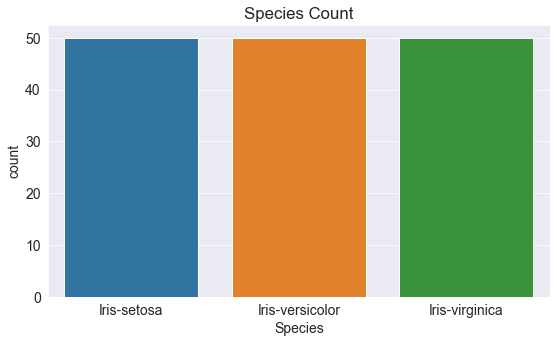

In [93]:
plt.title('Species Count')
sns.countplot(iris_df['Species']);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


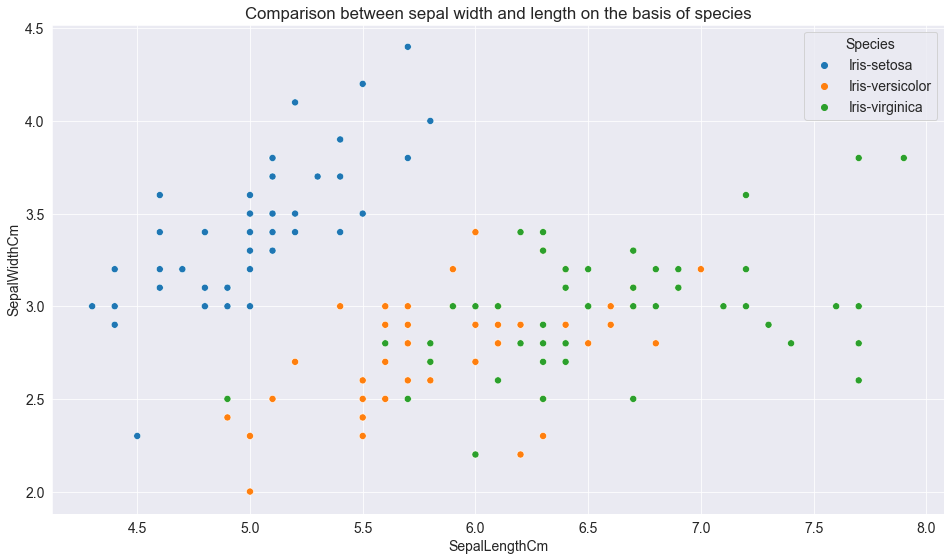

In [94]:
#Comparing the sepal length and width for the three species

plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], hue = iris_df['Species'], s= 50);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


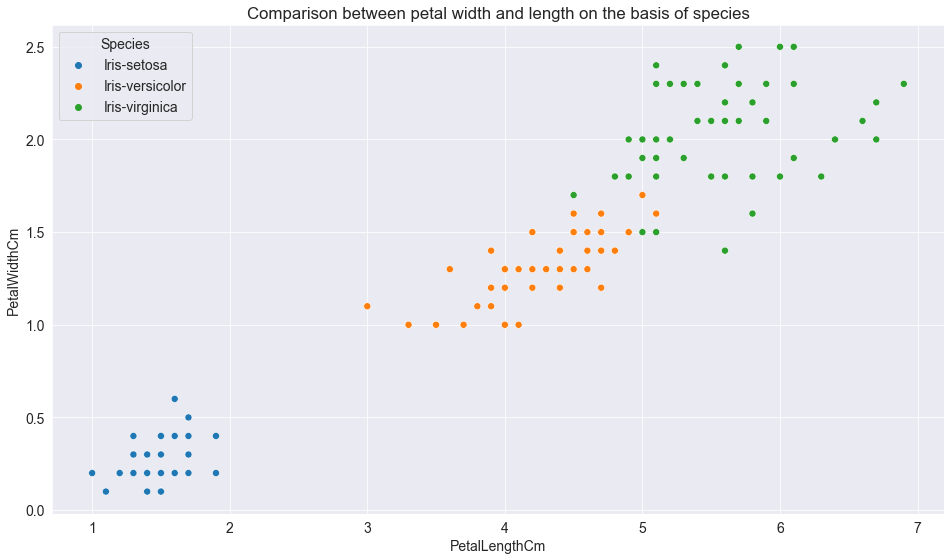

In [95]:
#Comparing the Petal Length and Petal Width for the three species

plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'], hue = iris_df['Species'], s= 50);

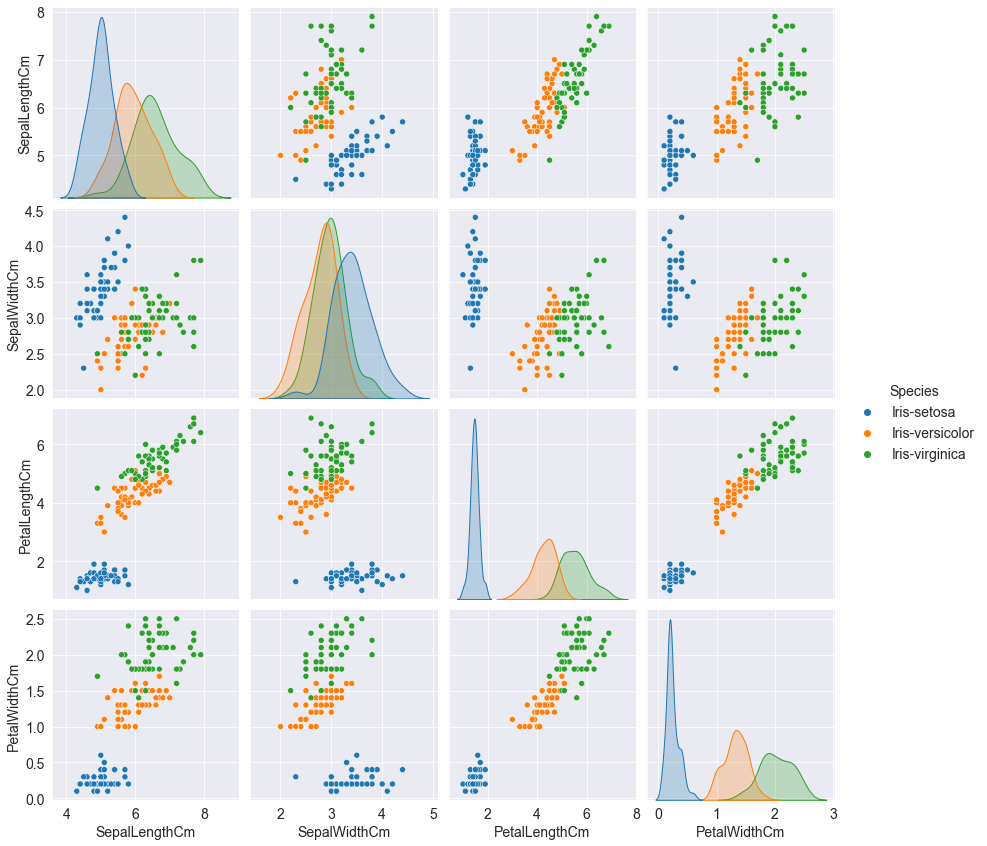

In [96]:
#Visualizing the column relationship using pair plots
sns.pairplot(iris_df,hue="Species",height=3);

In [97]:
#Summary of numerical features

numerical_columns = iris_df.dtypes[iris_df.dtypes != 'object'].index
iris_df[numerical_columns].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
#Correlation between Variables
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


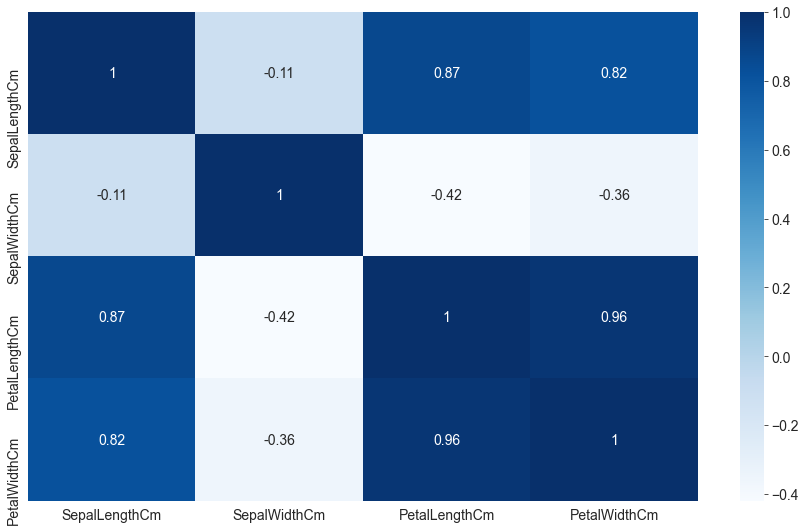

In [99]:
#Visualization of Correlation using heatmap

fig = plt.figure(figsize = (15,9))
sns.heatmap(iris_df.corr(), cmap='Blues', annot = True);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

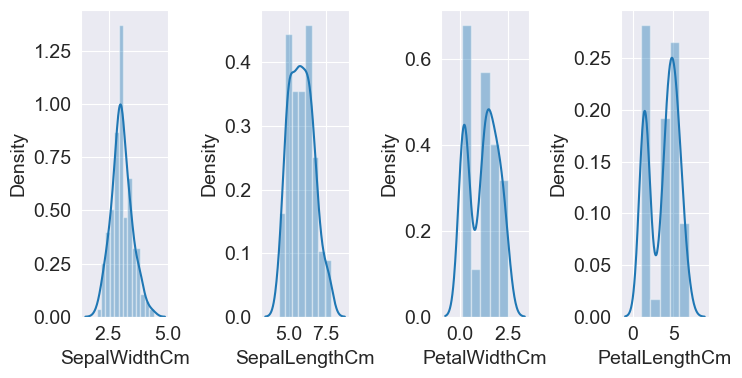

In [100]:
#Checking the type of distribution of our columns
cols = ['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(iris_df[col])
    i = i+1
plt.tight_layout()
plt.show()

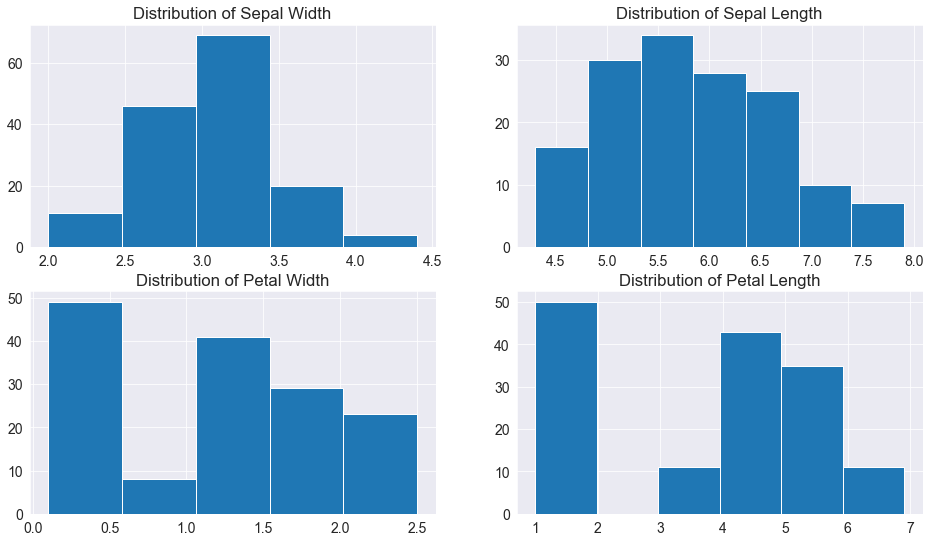

In [101]:
#Since the distribution is normal distribution
#So we check the distribution of data using Histogram
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['SepalLengthCm'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['PetalLengthCm'], bins=6);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

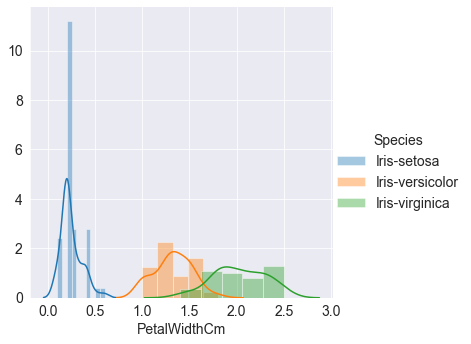

In [102]:
#Unvariate analysis of the columns
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

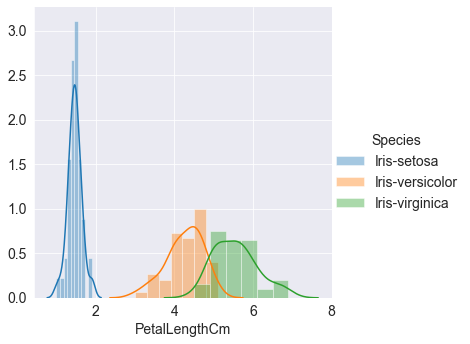

In [103]:
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

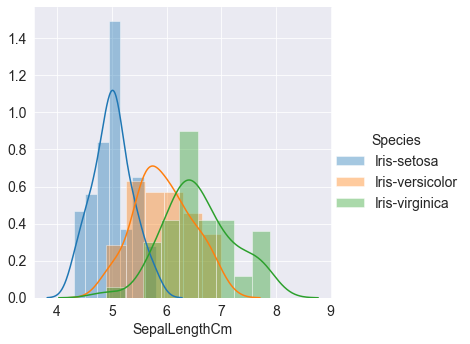

In [104]:
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

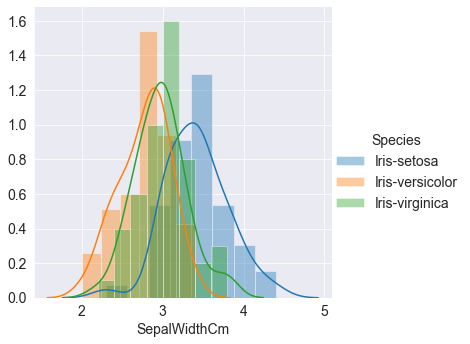

In [105]:
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();

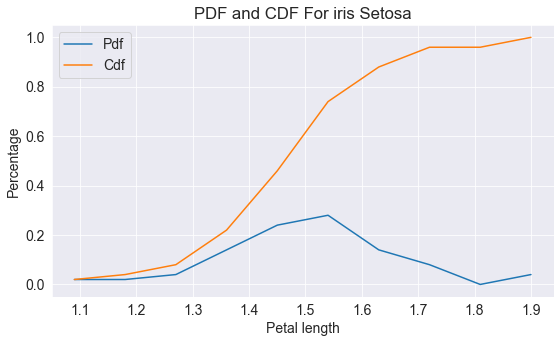

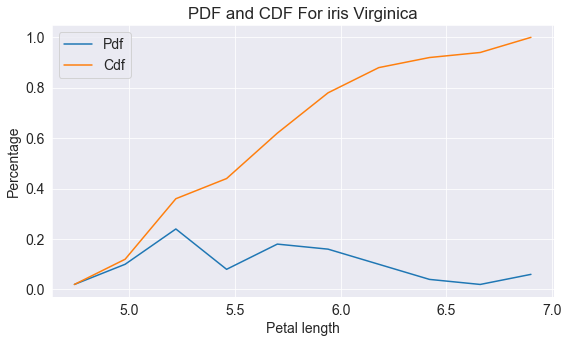

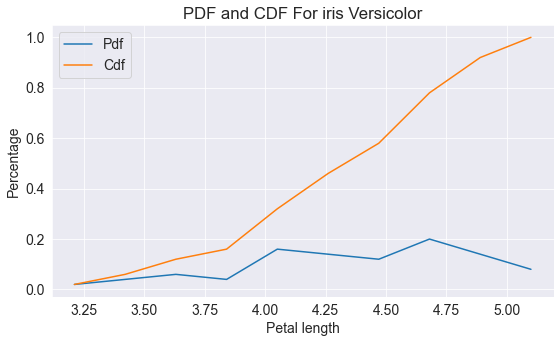

In [106]:
#Probability Distribution function & Cumulative Distribution Function

iris_setosa=iris_df.loc[iris_df["Species"]=="Iris-setosa"]
iris_virginica=iris_df.loc[iris_df["Species"]=="Iris-virginica"]
iris_versicolor=iris_df.loc[iris_df["Species"]=="Iris-versicolor"]

#for iris_setosa
counts,bin_edges=np.histogram(iris_setosa["PetalLengthCm"],bins=10,density=True)
pdf=counts/(sum(counts))
#print(pdf)
#print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(('Pdf','Cdf'))
plt.title('PDF and CDF For iris Setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show()

#for iris_virginica

counts,bin_edges=np.histogram(iris_virginica["PetalLengthCm"],bins=10,density=True)
pdf=counts/(sum(counts))
#print(pdf)
#print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(('Pdf','Cdf'))
plt.title('PDF and CDF For iris Virginica')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show()

#for iris_versicolor
counts,bin_edges=np.histogram(iris_versicolor["PetalLengthCm"],bins=10,density=True)
pdf=counts/(sum(counts))
#print(pdf)
#print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(('Pdf','Cdf'))
plt.title('PDF and CDF For iris Versicolor')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show()

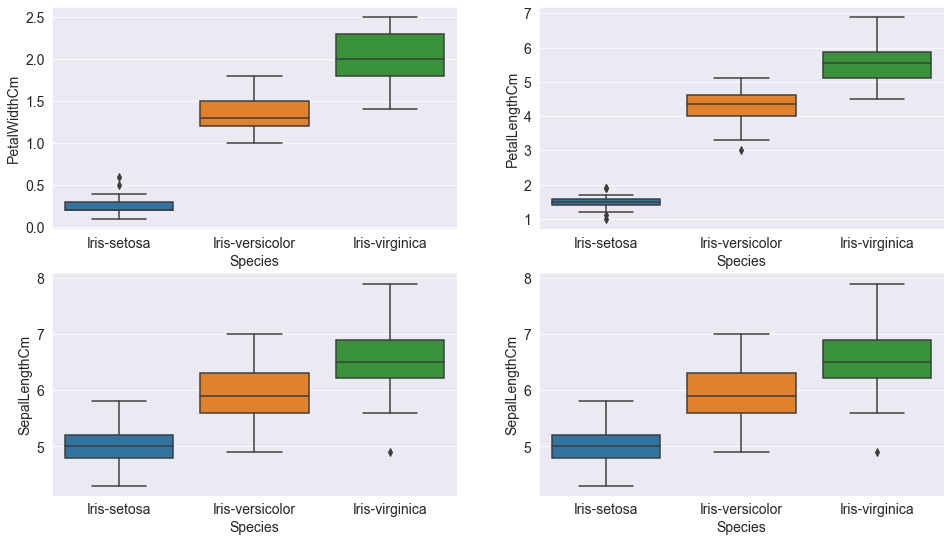

In [107]:
#Box plot of the columns
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="PetalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="PetalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

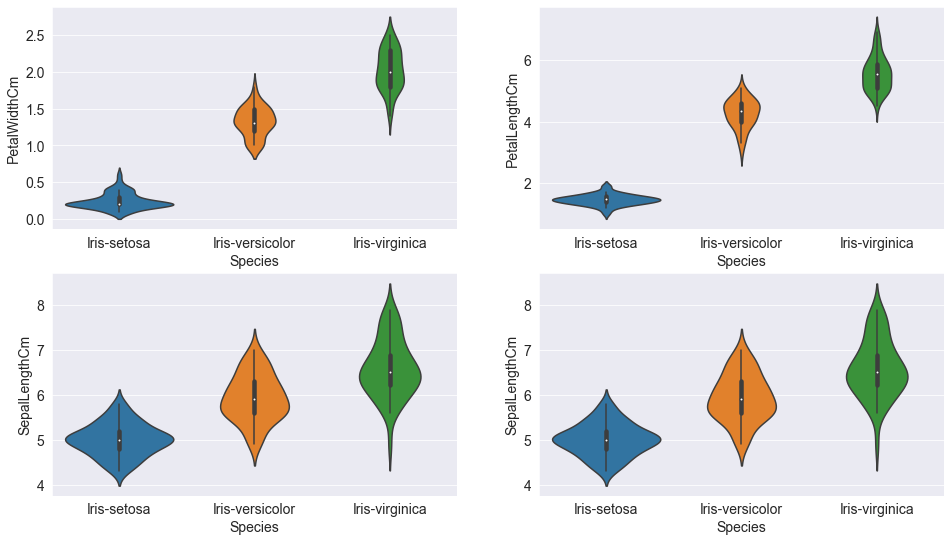

In [108]:
#Analysing the columns using violin plots
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot( y="PetalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot( y="PetalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot( y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot( y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

# Using Sklearn and making ML Models

In [109]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [110]:
#Splitting our validation dataset
# in this our main data is split into train and test
#the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

train, test = train_test_split(iris_df, test_size = 0.3)

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [111]:
# output of our training data
# taking the training data features
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

#output value of test data
# taking test data features
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species   

In [112]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
20,5.4,3.4,1.7,0.2
77,6.7,3.0,5.0,1.7


In [113]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
138,6.0,3.0,4.8,1.8
113,5.7,2.5,5.0,2.0


In [114]:
#output of the training data
train_y.head() 

20         Iris-setosa
77     Iris-versicolor
102     Iris-virginica
131     Iris-virginica
118     Iris-virginica
Name: Species, dtype: object

### Testing the various ML models

In [115]:
results = []
names = []
r_index=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [116]:
#Support Vector Machine (SVM)

model = svm.SVC()

# we train the algorithm with the training data and the training output
model.fit(train_X,train_y)

#now we pass the testing data to the trained algorithm
prediction=model.predict(test_X)

names.append('SVM')
results.append(metrics.accuracy_score(prediction,test_y))

#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y)) 


The accuracy of the SVM is: 0.9777777777777777


In [117]:
#Logistic Regression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(train_X,train_y)
prediction=model.predict(test_X)

names.append('LR')
results.append(metrics.accuracy_score(prediction,test_y))

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


In [118]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

names.append('DT')
results.append(metrics.accuracy_score(prediction,test_y))

print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


In [119]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)

names.append('KNN')
results.append(metrics.accuracy_score(prediction,test_y))

print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


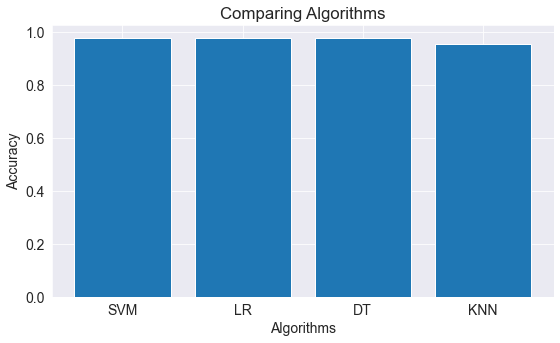

In [120]:
# Compare Algorithms
y = results
x = range(4)
#low = min(y)
#high = max(y)
#plt.ylim([math.ceil(low-0.7*(high-low)), math.ceil(high+0.7*(high-low))])
plt.bar(x,y)
plt.xticks(x,names)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparing Algorithms')
plt.show()

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately

In [121]:
# Creating Petals abd Sepals training dataset
petal=iris_df[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris_df[['SepalLengthCm','SepalWidthCm','Species']]

In [122]:
#petals
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

#Sepal
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [123]:
petals =[]
sepals = []

In [124]:
#SVM

model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [125]:
#Logistic Regression

model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [126]:
#Decision Tree

model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [127]:
#K Nearest Neighbours

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p)
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


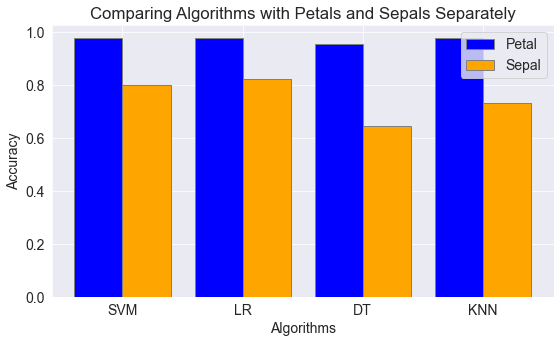

In [128]:
# Comparing the accuracy of sepal and petal
   
# set width of bar 
barWidth = 0.40
    
x = np.arange(4)
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, petals, color ='blue', width = barWidth, 
        edgecolor ='grey', label ='Petal') 
plt.bar(x+0.2, sepals, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='Sepal') 
   
plt.legend(["Petal", "Sepal"]) 
plt.xlabel('Algorithms') 
plt.ylabel('Accuracy') 
plt.title('Comparing Algorithms with Petals and Sepals Separately')
plt.xticks(x, ['SVM','LR','DT','KNN'])
   
plt.show()

# Feature Engineering

In [129]:
# Checking for any missing values
iris_df.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [130]:
# Summarizing the missing values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

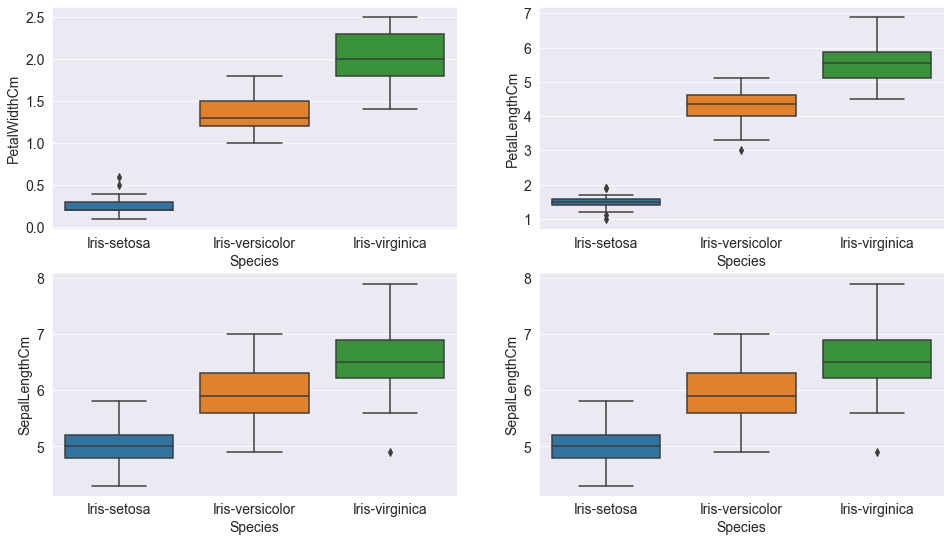

In [131]:
# Checking for Outliers using Box Plot
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="PetalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="PetalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

In [132]:
# As there are dotted points after the box plots, this means that there are outliers
# Now removing the outliers using IQR
Q1 = iris_df.quantile(0.25)
Q3 = iris_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


In [133]:
# Now detecting the outliers where the data point where we have False that means these values are valid whereas True indicates presence of an outlie0r.
print(iris_df < (Q1 - 1.5 * IQR)) |(iris_df > (Q3 + 1.5 * IQR))

     PetalLengthCm  PetalWidthCm  SepalLengthCm  SepalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [ ]:
iris_df_out = iris_df[~((iris_df < (Q1 - 1.5 * IQR)) |(iris_df > (Q3 + 1.5 * IQR))).any(axis=1)]
iris_df_out.shape

## Again testing the various ML Models on the improved dataset

In [ ]:
train, test = train_test_split(iris_df_out, test_size = 0.3)

print(train.shape)
print(test.shape)

In [ ]:
# output of our training data
# taking the training data features
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species

#output value of test data
# taking test data features
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y =test.Species   

In [134]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
20,5.4,3.4,1.7,0.2
77,6.7,3.0,5.0,1.7


In [135]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
138,6.0,3.0,4.8,1.8
113,5.7,2.5,5.0,2.0


In [136]:
train_y.head()

20         Iris-setosa
77     Iris-versicolor
102     Iris-virginica
131     Iris-virginica
118     Iris-virginica
Name: Species, dtype: object

In [137]:
results = []
names = []
r_index=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [138]:
#Support Vector Machine (SVM)

model = svm.SVC()

# we train the algorithm with the training data and the training output
model.fit(train_X,train_y)

#now we pass the testing data to the trained algorithm
prediction=model.predict(test_X)

names.append('SVM')
results.append(metrics.accuracy_score(prediction,test_y))

#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y)) 


The accuracy of the SVM is: 0.9777777777777777


In [139]:
#Logistic Regression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(train_X,train_y)
prediction=model.predict(test_X)

names.append('LR')
results.append(metrics.accuracy_score(prediction,test_y))

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


In [140]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)

names.append('DT')
results.append(metrics.accuracy_score(prediction,test_y))

print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


In [141]:
# K-Nearest Neighbours
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)

names.append('KNN')
results.append(metrics.accuracy_score(prediction,test_y))

print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


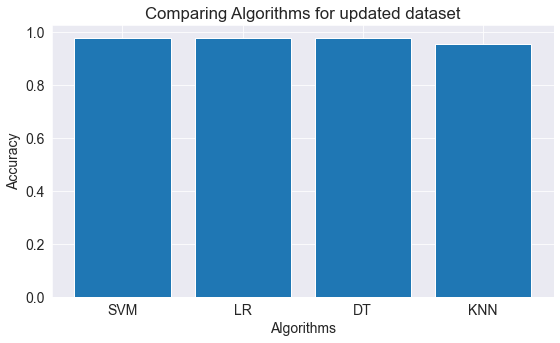

In [142]:
# Compare Algorithms
y = results
x = range(4)
#low = min(y)
#high = max(y)
#plt.ylim([math.ceil(low-0.7*(high-low)), math.ceil(high+0.7*(high-low))])
plt.bar(x,y)
plt.xticks(x,names)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparing Algorithms for updated dataset')
plt.show()

### We used all the features of iris in above models. Now we will use Petals and Sepals Seperately for new dataset

In [143]:
# Creating Petals abd Sepals training dataset
petal=iris_df_out[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris_df_out[['SepalLengthCm','SepalWidthCm','Species']]

In [144]:
#petals
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

#Sepal
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [145]:
petals =[]
sepals = []

In [146]:
#SVM

model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9772727272727273
The accuracy of the SVM using Sepal is: 0.7954545454545454


In [147]:
#Logistic Regression

model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9772727272727273
The accuracy of the Logistic Regression using Sepals is: 0.8409090909090909


In [148]:
#Decision Tree

model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9772727272727273
The accuracy of the Decision Tree using Sepals is: 0.6818181818181818


In [149]:
#K Nearest Neighbours

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p)
petals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
sepals.append(metrics.accuracy_score(prediction,test_y_p))
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9772727272727273
The accuracy of the KNN using Sepals is: 0.75


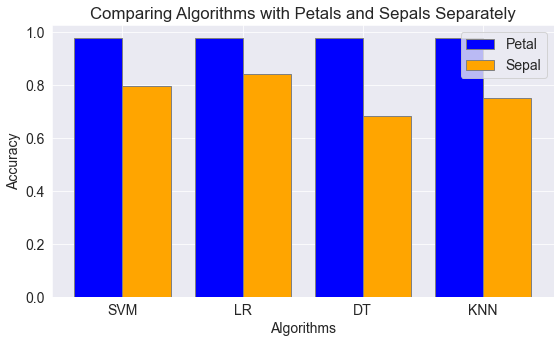

In [150]:
# Comparing the accuracy of sepal and petal
   
# set width of bar 
barWidth = 0.40
    
x = np.arange(4)
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, petals, color ='blue', width = barWidth, 
        edgecolor ='grey', label ='Petal') 
plt.bar(x+0.2, sepals, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='Sepal') 
   
plt.legend(["Petal", "Sepal"]) 
plt.xlabel('Algorithms') 
plt.ylabel('Accuracy') 
plt.title('Comparing Algorithms with Petals and Sepals Separately')
plt.xticks(x, ['SVM','LR','DT','KNN'])
   
plt.show()